In [2]:
# import librosa
# import librosa.display


print(__doc__)

import os
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Automatically created module for IPython interactive environment


/f/gfs1/yiyangli/.lang_env/local/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/f/gfs1/yiyangli/.lang_env/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/f/gfs1/yiyangli/.lang_env/local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/f/gfs1/yiyangli/.lang_env/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:169: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first

/f/gfs1/yiyangli/.lang_env/local/lib/python2.7/site-packages/sklearn/datasets/svmlight_format.py:25: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._svmlight_format import _load_svmlight_file


In [7]:
pred_path = "/f/gfs1/yiyangli/lang_detect/tensorflow/vision/results_mfcc_cmvn_vtln.txt"
test_data_dir = "/f/gfs1/yiyangli/lang_detect/imgs_1min_mfcc/test_imgs.txt"


y_pred = []
with open(pred_path) as file:
    for row in file:
        row = row.strip()
        if row[0] == "[":
            row = row[1:]
        if row[-1] == "]":
            row = row[:-1]
        row = row.split()
        y_pred += row
for i in range(len(y_pred)):
    y_pred[i] = int(y_pred[i])


test_filenames = []
with open(test_data_dir,"r") as f:
    for row in f:
        test_filenames.append(row.strip())


test_labels = [int(f.split('/')[-1][0]) for f in test_filenames]

y_test = test_labels

        
y_test = np.array(y_test)
y_pred = np.array(y_pred)

print len(y_pred)
print len(y_test)

1006
1006


Confusion matrix, without normalization
[[821  28  14  19   4]
 [  3  27   0   0   0]
 [  1   0  29   0   0]
 [  0   0   0  30   0]
 [  1   0   0   0  29]]
Normalized confusion matrix
[[0.93 0.03 0.02 0.02 0.  ]
 [0.1  0.9  0.   0.   0.  ]
 [0.03 0.   0.97 0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.03 0.   0.   0.   0.97]]


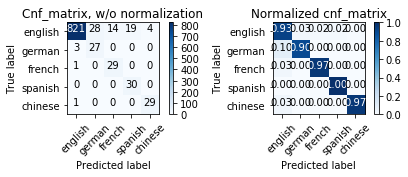

In [8]:




class_names = ['english', 'german', 'french', 'spanish', 'chinese']





assert len(y_test) == len(y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plt.subplot(221)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Cnf_matrix, w/o normalization')

# Plot normalized confusion matrix
plt.subplot(222)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized cnf_matrix')

plt.savefig("cnf_matrix.png")
plt.show()
